# Jobsheet 6 - Support Vector Machine

<b>IDENTITAS</b>

NIM: 2041720224

Nama: Fauzan Pradana

Kelas: TI3G

## Tujuan

1. Mahasiswa mampu menerapkan metode support vector machine (SVM) dalam sebuah kasus sederhana
2. Mahasiswa mampu melakukan analisis dasar berdasarkan luaran dari metode SVM yang dijalankan berdasarkan kasus yang dikerjakan

In [7]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
# Read file csv
from sklearn.datasets import fetch_lfw_people
import pandas as pd
salary = pd.read_csv('dataset/gaji.csv')
salary

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [9]:
# Menggunakan LabelEncoder untuk mengkonversi nilai posisi menjadi urutan 
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

salary['PosisiEncode'] = labelencoder.fit_transform(salary['Posisi'])

In [10]:
# Menambahkan kolom untuk mengenerate category gaji berdasarkan kolom gaji dengan pembatas 100000
# 0 = Gaji Rendah
# 1 = Gaji Tinggi
def categorise(row):  
    if row['Gaji'] > 100000 :
        return 1
    else:
        return 0

salary['category'] = salary.apply(lambda row: categorise(row), axis=1)
salary

,Posisi,Level,Gaji,PosisiEncode,category
0,Business Analyst,1,45000,0,0
1,Junior Consultant,2,50000,4,0
2,Senior Consultant,3,60000,8,0
3,Manager,4,80000,5,0
4,Country Manager,5,110000,3,1
5,Region Manager,6,150000,7,1
6,Partner,7,200000,6,1
7,Senior Partner,8,300000,9,1
8,C-level,9,500000,1,1
9,CEO,10,1000000,2,1


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



Text(69.0, 0.5, 'Truth')

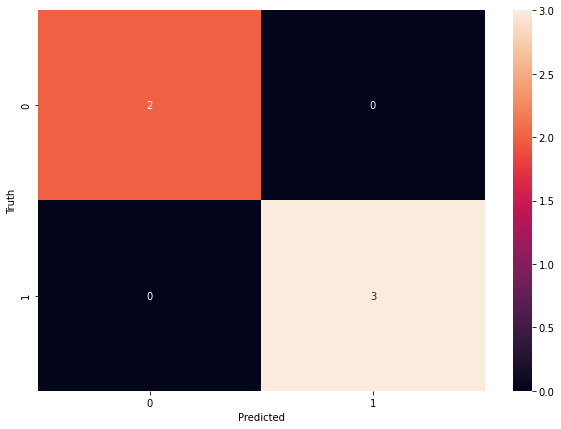

In [11]:
#deklarasi training dan testing data
X = salary[['PosisiEncode','Level','Gaji']]
y = salary['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
 
#menggunakan SVM library untuk membuat SVM classifier
classifier = svm.SVC(kernel = 'linear')
 
#memasukkan training data kedalam classifier
classifier.fit(X_train, y_train)
 
#memasukkan testing data ke variabel y_predict
y_predict = classifier.predict(X_test)
 
#menampilkan classification report
print(classification_report(y_test, y_predict))
 
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test, y_predict)
 
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')